<a href="https://colab.research.google.com/github/Vector42-rev/learning_to_make_machine_learn/blob/lab_stuff/ML_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""A1. Write your own functions for the following modules:
a) Summation unit
b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions
c) Comparator unit for Error calculation """

In [24]:
# Import necessary libraries for numerical computations and math operations
import numpy as np
import math

# Define a function to calculate the dot product of two arrays (X and W)
def summation_unit(X,W):
  # Return the result of the dot product operation
  return np.dot(X,W)

# Define a step activation function
def step_function(yin):
  # If yin is greater than or equal to 0, return 1; otherwise, return 0
  if yin>=0:
    return 1
  else:
    return 0

# Define a bipolar (signum) activation function
def bipolar_function(yin):
  # If yin is greater than 0, return 1; if yin is 0, return 0; otherwise, return -1
  if yin>0:
    return 1
  elif yin==0:
    return 0
  else:
    return -1

# Define a logistic sigmoid function (one of many available)
def sigmoid_function(yin):
  # Return the result of the logistic sigmoid operation: 1 / (1 + exp(-yin))
  yin = np.clip(yin, -500, 500)
  return (1/(1+np.exp(-yin)))

# Define a hyperbolic tangent (tanh) activation function
def tanh_function(yin):
  # Return the result of the tanh operation: ((exp(yin) - exp(-yin)) / (exp(yin) + exp(-yin)))
  return ((np.exp(yin)-np.exp(-yin))/(np.exp(yin)+np.exp(-yin)))

# Define a rectified linear unit (relu) activation function
def relu_function(yin):
  # If yin is less than 0, return 0; otherwise, return yin
  if yin<0:
    return 0
  else:
    return yin

# Define a leaky relu activation function with a slope parameter (beta)
def leaky_relu_function(yin,beta):
  # If yin is less than 0, return beta*yin; otherwise, return yin
  if yin<0:
    return beta*yin
  else:
    return yin

# Define an activation unit function that selects the desired activation type
def activation_unit(yin,typ):
  # If typ is "step", return the step function result
  if typ=="step":
    return step_function(yin)

  # If typ is "bipolar", "bipolarstep", "sign", or "signum", return the bipolar function result
  elif typ=="bipolar" or typ=="bipolarstep" or typ=="sign" or typ=="signum":
    return bipolar_function(yin)

  # If typ is "sigmoid", return the sigmoid function result
  elif typ=="sigmoid":
    return sigmoid_function(yin)

  # If typ is "tanh", return the tanh function result
  elif typ=="tanh":
    return tanh_function(yin)

  # If typ is "relu", return the relu function result
  elif typ=="relu":
    return relu_function(yin)

  # If typ is "leakyrelu", return the leaky relu function result with beta=0.01 (default value)
  elif typ=="leakyrelu":
    return leaky_relu_function(yin,0.01) # Default beta value

  # If typ is not recognized, print an error message and return None
  else:
    print("Function unavailable")

# Define a comparator unit function that calculates the difference between two values (y and y_cap)
def comparator_unit(y,y_cap):
  # Return the result of subtracting y_cap from y
  return y-y_cap

In [ ]:
"""A2. Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Write a function for Activation function. Develop & Use the code for Step activation function to learn
the weights of the network to implement above provided AND gate logic. The activation function is
demonstrated below. """

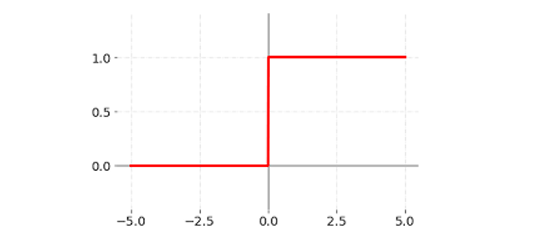

In [ ]:
"""
Identify the number of epochs needed for the weights to converge in the learning process. Make a
plot of the epochs against the error values calculated (after each epoch, calculate the sum-square
error against all training samples).
(Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning
after 1000 iterations if the convergence error condition is not met.) """

In [15]:
W=np.array([10,0.2,-0.75])
X=np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
Y=np.array([0,0,0,1])

"""W=[1.5,-1.7]
X=[[0.03,1.27],[-0.23,0.02]]
Y=[0,1]
W=np.array(W)
X=np.array(X)
Y=np.array(Y)"""
def perceptron(x,w,y,actication_function):
  yin=summation_unit(x,w)
  y_cap=activation_unit(yin,actication_function)
  error=comparator_unit(y,y_cap)
  return error


def perceptron_learning(X,W,Y,alpha,actication_function):
  E=[]
  if len(X)!=len(Y):
    print("Invaild inputs!!")
    return

  M=len(X)
  I=len(W)
  for j in range(0,M):
    error=perceptron(X[j],W,Y[j],actication_function)
    E.append(error)
    for i in range(0,I):
      W[i]+=(alpha*X[j][i]*error)
  return W,E

def sum_square_error(E):
  res=0
  for x in E:
    res+=pow(x,2)
  return res/2



def fit(X,W,Y,alpha,epochs_limit,sse_limit,actication_function):
  epochs=0
  SSE=0
  sse=[]
  while(epochs <=epochs_limit):
    W,E=perceptron_learning(X,W,Y,alpha,actication_function)
    epochs+=1
    #print("Completed Epoch:- "+str(epochs))
    SSE=sum_square_error(E)
    sse.append(SSE)
    if SSE<=sse_limit:
      break


  epochs-=1
  if SSE<=sse_limit:
    print("Learning converged in "+str(epochs)+" epochs")
  else:
    print("Learning is unable to converge.")

  return epochs,sse,W,E



epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"step")


Learning converged in 93 epochs


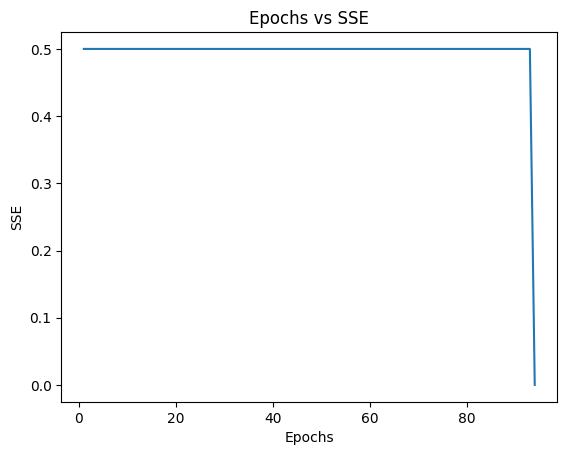

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

In [ ]:
"""
A3. Repeat the above A1 experiment with following activation functions (write your own code for
activation functions). Compare the iterations taken to converge against each of the activation
functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function """

Learning is unable to converge.


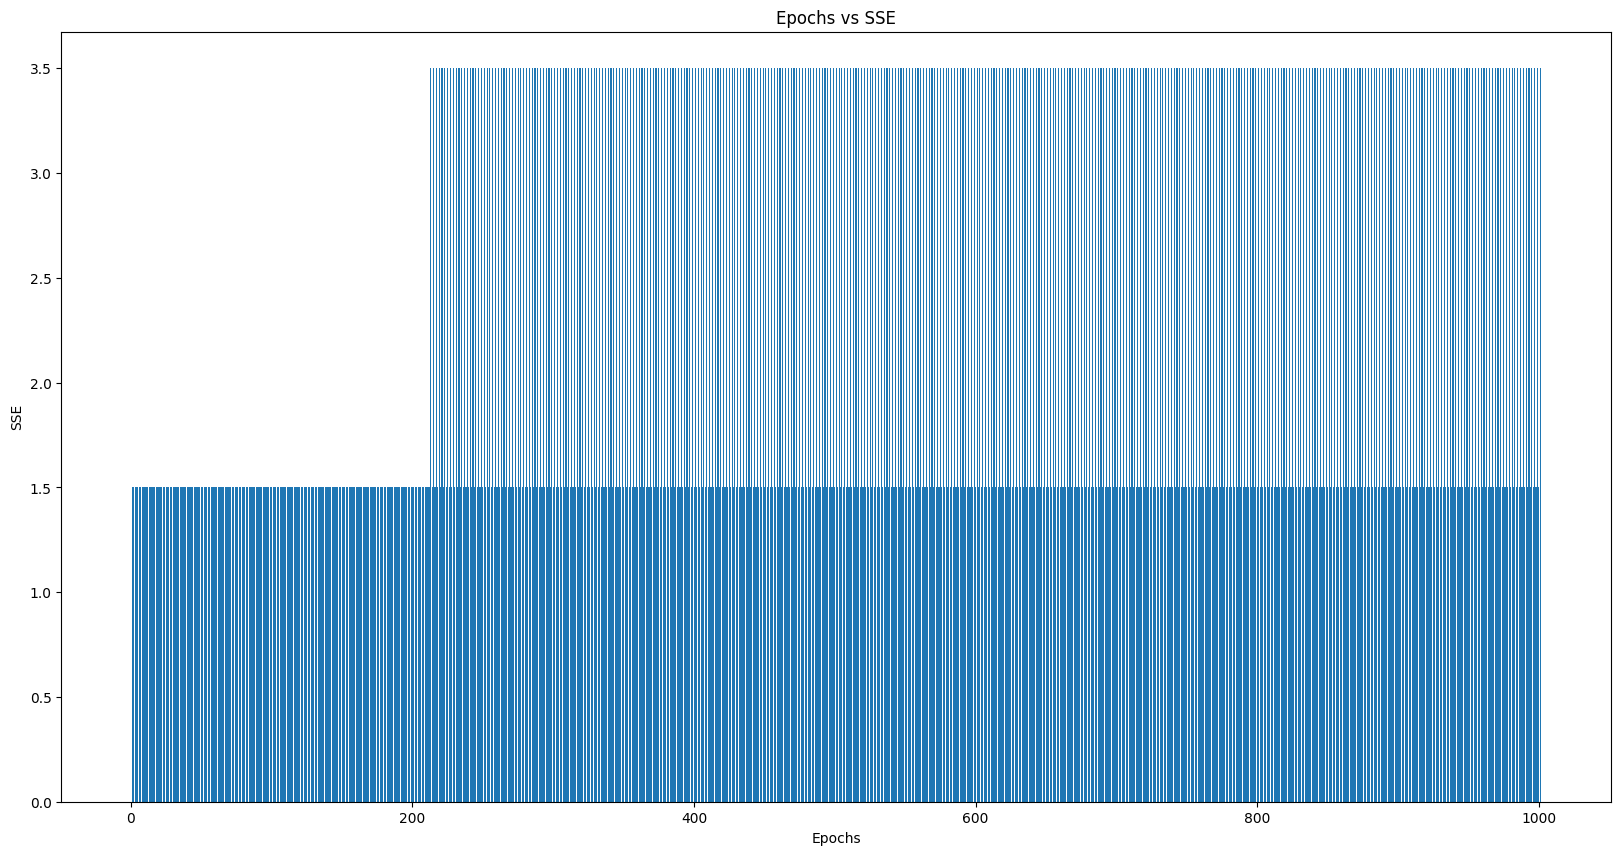

In [ ]:
epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"bipolar")
plt.figure(figsize=(20, 10))
plt.bar(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

Learning is unable to converge.


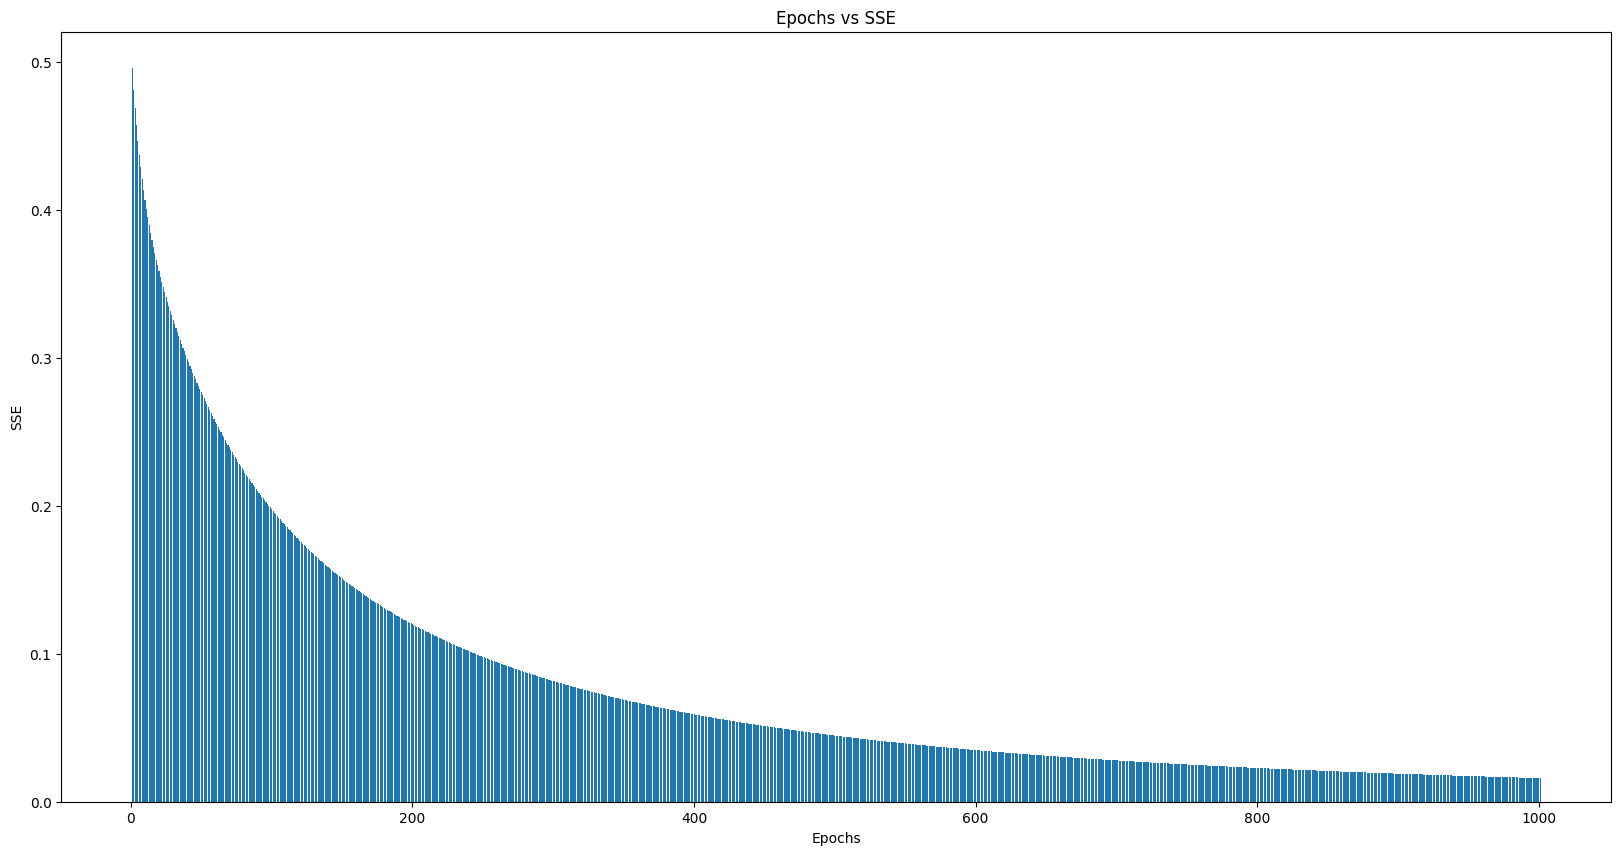

In [ ]:
epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"sigmoid")
plt.figure(figsize=(20, 10))
plt.bar(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

Learning converged in 17 epochs


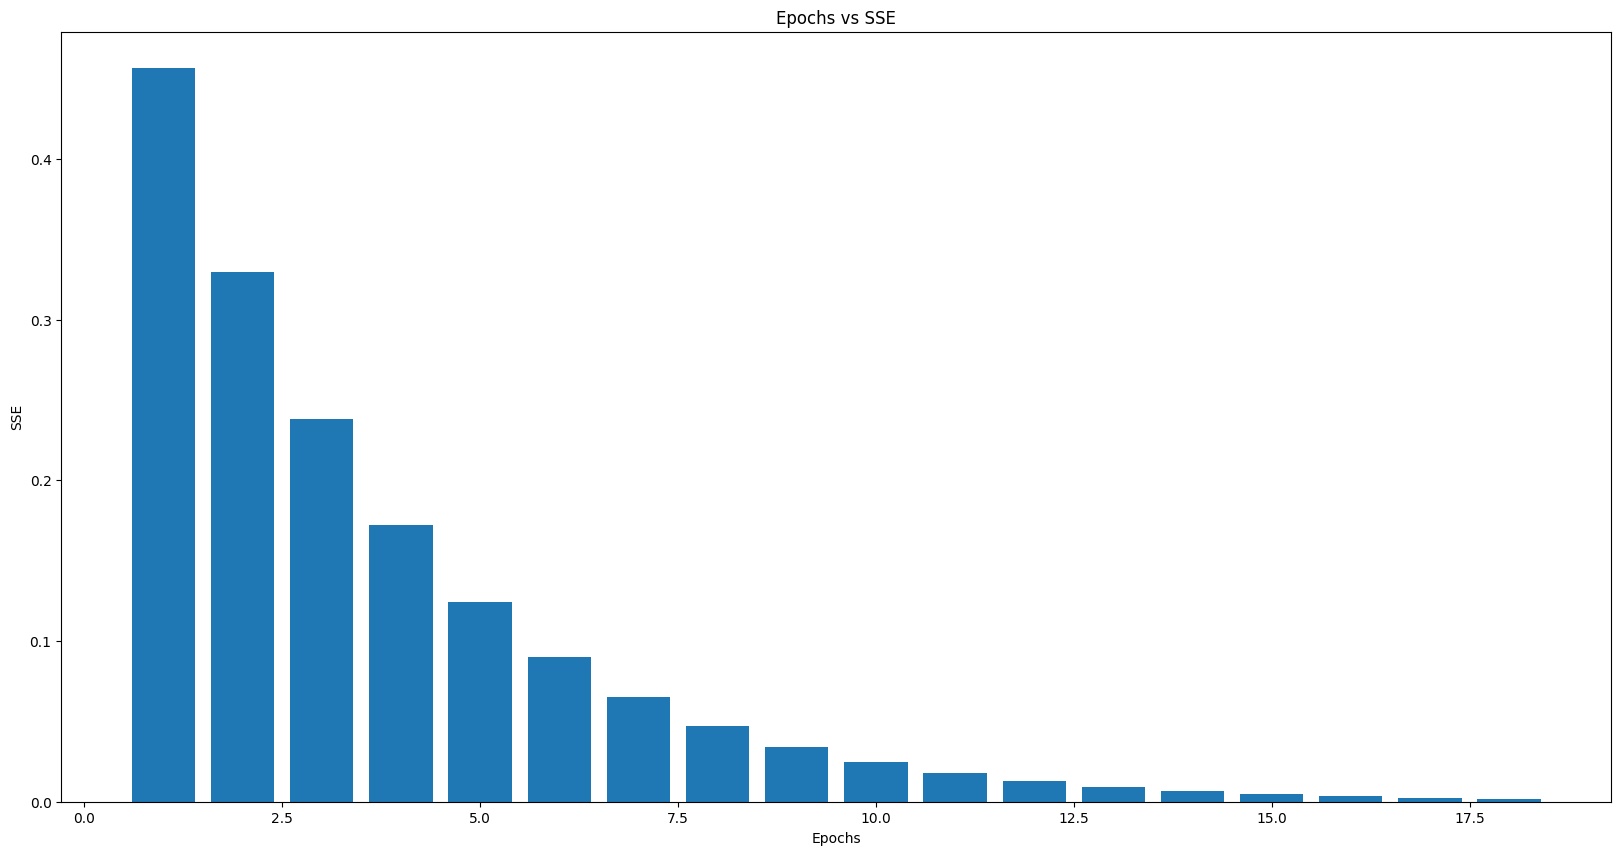

In [ ]:
epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"relu")
plt.figure(figsize=(20, 10))
plt.bar(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

In [ ]:
"""A4. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates. """

Learning converged in 47 epochs
47
Learning converged in 25 epochs
25
Learning converged in 17 epochs
17
Learning converged in 13 epochs
13
Learning converged in 12 epochs
12
Learning converged in 9 epochs
9
Learning converged in 8 epochs
8
Learning converged in 7 epochs
7
Learning converged in 8 epochs
8
Learning converged in 6 epochs
6


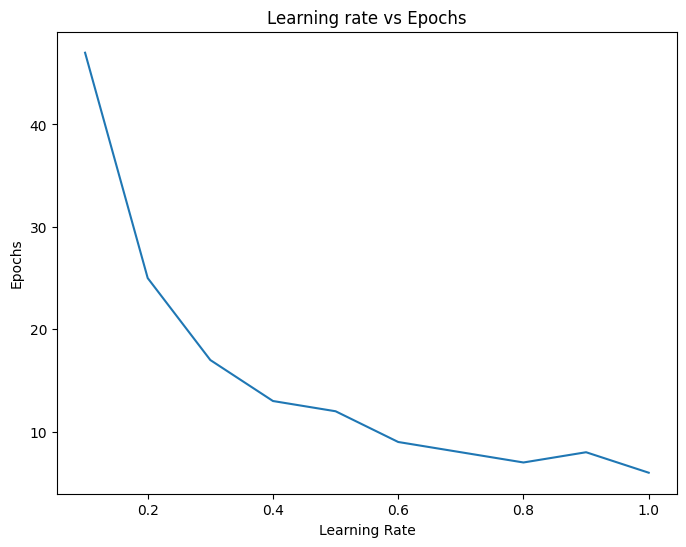

In [ ]:
W=np.array([10,0.2,-0.75])
W1=W.copy()
X=np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
Y=np.array([0,0,0,1])
alphas=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
epo=[]
for i in range(0,len(alphas)):
  epochs,sse,W,E=fit(X,W,Y,alphas[i],1000,0.002,"step")
  W=W1.copy()
  print(epochs)
  epo.append(epochs)

plt.figure(figsize=(8,6))
plt.plot(alphas,epo)
plt.title('Learning rate vs Epochs')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')
plt.show()

In [ ]:
"""
A5. Repeat the above exercises, A1 to A3, for XOR gate logic.
"""

Learning is unable to converge.


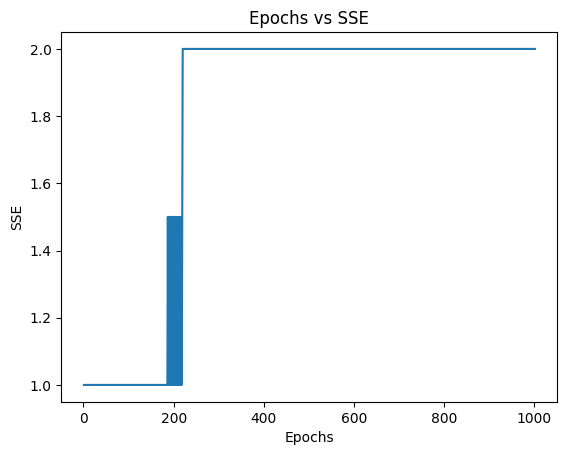

In [ ]:
W=np.array([10,0.2,-0.75])
X=np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
Y=np.array([0,1,1,0])


epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"step")
plt.plot(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

Learning is unable to converge.


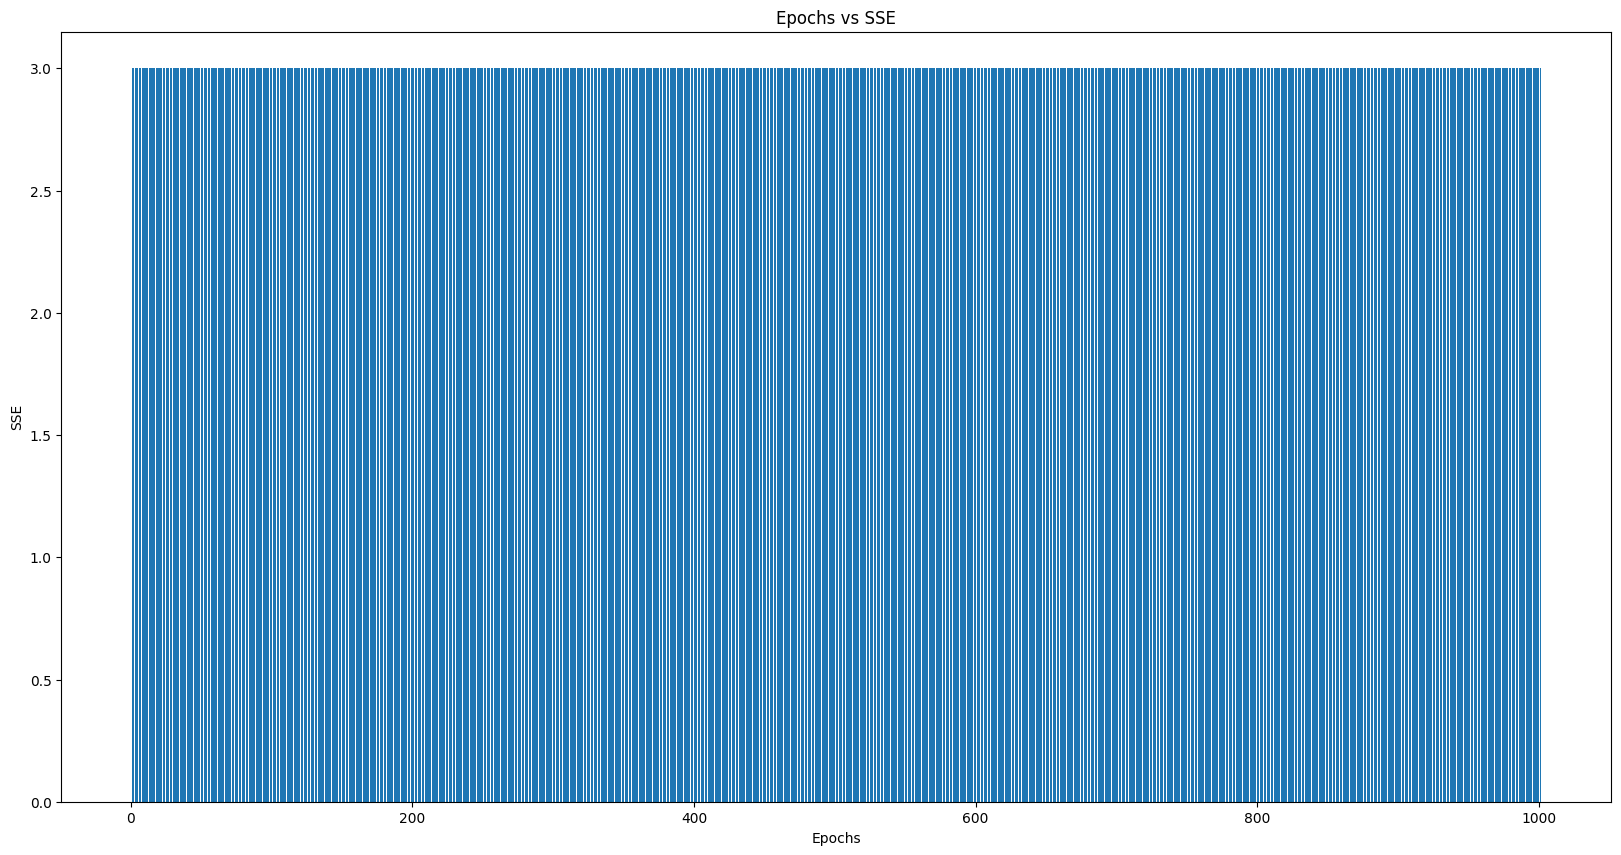

In [ ]:
epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"bipolar")
plt.figure(figsize=(20, 10))
plt.bar(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

Learning is unable to converge.


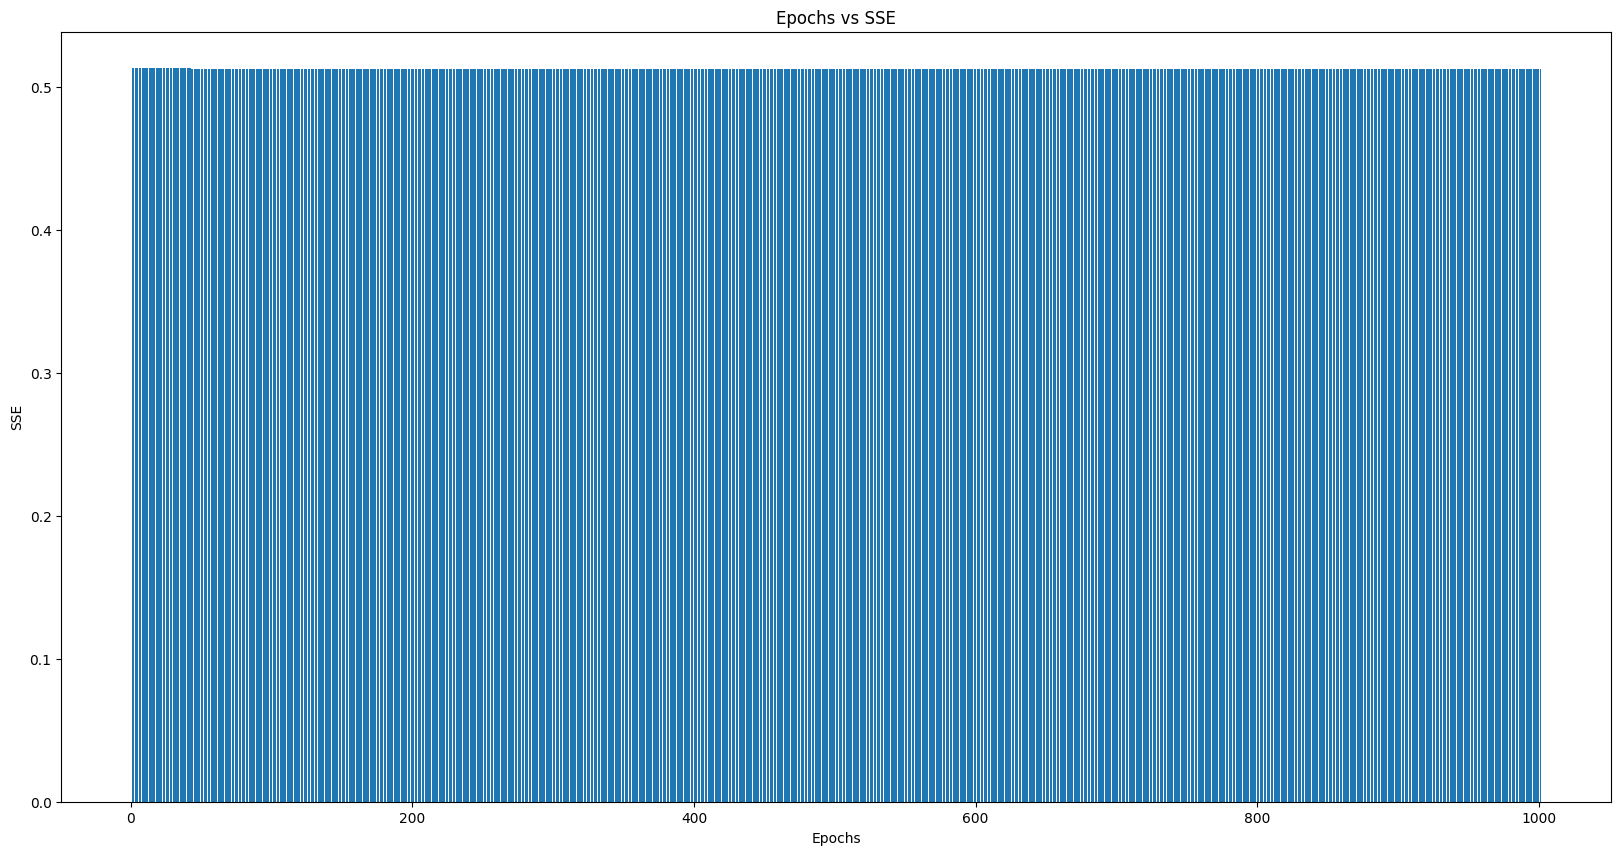

In [ ]:
epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"sigmoid")
plt.figure(figsize=(20, 10))
plt.bar(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

Learning is unable to converge.


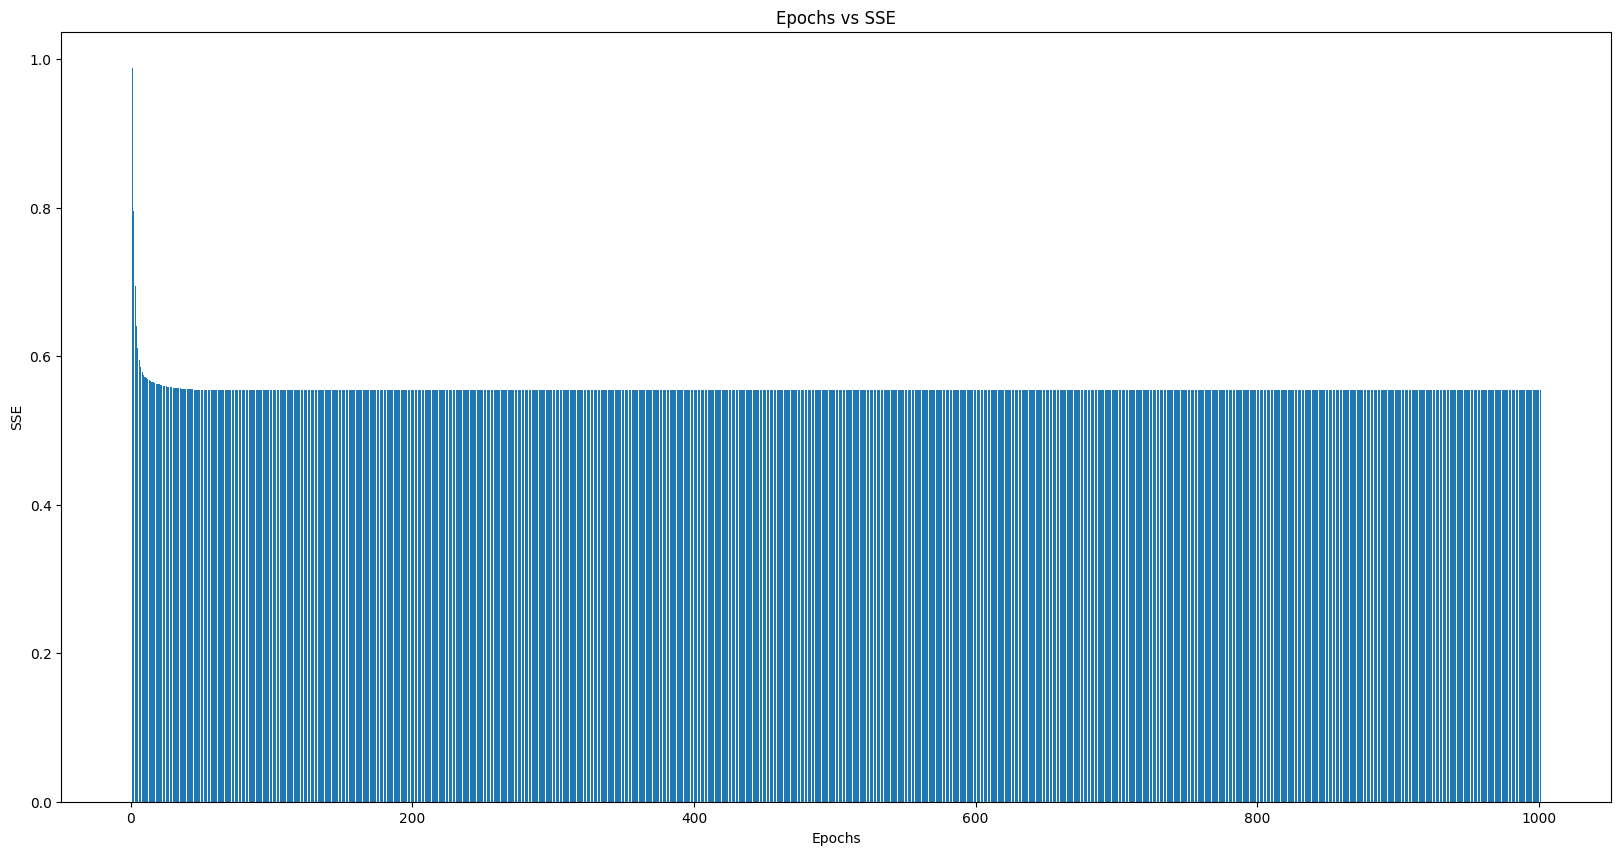

In [ ]:
epochs,sse,W,E=fit(X,W,Y,0.05,1000,0.002,"relu")
plt.figure(figsize=(20, 10))
plt.bar(list(range(1,epochs+2)),sse)
plt.title('Epochs vs SSE')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

In [ ]:
"""
A6. Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice.


Customer,Candies(#),Mangoes (Kg),Milk Packets(#),Payment(Rs),High Value(Tx)
C_1, 20, 6, 2, 386, Yes
C_2, 16, 3, 6, 289 Yes
C_3 27 6 2 393 Yes
C_4 19 1 2 110 No
C_5 24 4 2 280 Yes
C_6 22 1 5 167 No
C_7 15 4 2 271 Yes
C_8 18 4 2 274 Yes
C_9 21 1 4 148 No
C_10 16 2 4 198 No
"""

In [ ]:
X = [
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]]

Y = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
W=[-0.02509198,  0.09014286,  0.04639879,  0.0197317]
alpha=0.1
epochs,sse,W1,E1=fit(X,W,Y,alpha,1000,0.002,"sigmoid")

Learning converged in 445 epochs


In [ ]:
"""
A7. Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse. """

In [ ]:
def perceptron_test(X,W):
  y_caps=[]
  for x in X:
    yin=summation_unit(x,W)
    y_cap=activation_unit(yin,"sigmoid")
    y_caps.append(y_cap)
  return y_caps
print("Perceptron Learning Results:-")
print(perceptron_test(X,W1))
X=np.array(X)
xi=np.linalg.pinv(X[:,0:3])
#print(X[:,0:3])
x2=X[:,3]
x2=x2.reshape(-1,1)
#print(x2)
x3=np.dot(xi,x2)
#print(x3)
x4=X[:,0:3]
#print(x4)
#print(x3)
x5=x4@x3
#print(x5)
res=(x5> 198).astype(int)
#print(res)
res=res.reshape(1,-1)
print(" Matrix Pseudo Inverse Results:- ")
print(res)

Perceptron Learning Results:-
[1.0, 1.0, 1.0, 7.124576406741285e-218, 0.9999998734221167, 7.124576406741285e-218, 1.0, 1.0, 7.124576406741285e-218, 1.5156833073771704e-25]
 Matrix Pseudo Inverse Results:- 
[[1 1 1 0 1 0 1 1 0 0]]


In [ ]:
"""
A8. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic.
Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning
after 1000 iterations if the convergence error condition is not met. Logic for back-propagation is
provided below.)"""



In [45]:
import numpy as np
np.set_printoptions(precision=10, suppress=False)
X=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y=np.array([0,0,0,1])
#print(X[0].shape[0])
max=3
W=np.full((3,max,max),0.5,dtype=float)


#print(W)
dw=np.full((3,max,max),0,dtype=float)
O=np.full((4,max,max),0,dtype=float)
def perceptron_ml(x,w,activation_function):
  yin=summation_unit(x,w)
  o1=activation_unit(yin,activation_function)
  return o1

# Define a comparator unit function that calculates the difference between two values (y and y_cap)
def comparator_unit(y,y_cap):
  # Return the result of subtracting y_cap from y
  return y-y_cap


def multi_layer_perceptron_learning(X,W,Y,O,activation_function,alpha):
  M=len(X)
  lwi=X[0].shape[0]
  lwo=1
  E=[]
  for i1 in range(0,M):
    #print("Iteration "+str(i1+1))
    #print("Weights:- ")
    #print(W)
    for i2 in range(0,lwi):
      O[0,i2,i2]=perceptron_ml(X[i1][i2],W[0,i2,i2],activation_function)
    #print("Weights after 1st  iteration:- ")
    #print(W)
    #print("Out matrix after 1st iteration")
    #print(O)
    for k in range(1,W.shape[0]):
      for i in range(0,O.shape[2]):
        for j in range(0,O.shape[1]):
          O[k,j,i]=perceptron_ml(O[k-1,j,i],W[k,j,i],activation_function)
    #print("Weights are after feed forward:- ")
    #print(W)
    #Back Propagation
    """for i2 in range(0,lwo):
      error=comparator_unit(Y[i1][i2],O[O.shape[0]-1,i2,i2])"""
    error=comparator_unit(Y[i1],O[O.shape[0]-1,0,0])
    E.append(error)
    for i in range(0,O.shape[2]):
      dw[W.shape[0]-1,i,i2]=alpha*error*O[O.shape[0]-2,i2,i2]
      W[W.shape[0]-1,i,i2]+=alpha*error*O[O.shape[0]-2,i2,i2]
    #print("weights after BP outer loop:- ")
    #print(W)
    #print("dw:- ")
    #print(dw)

    for k in range(W.shape[0]-1,2,-1):
      for j in range(0,O.shape[1]):
          error=np.sum(dw[k,j,:])
          for i in range(0,O.shape[2]):
            dw[k-2,j,i]=alpha*error*O[k-1,j,i]
            W[k-2,j,i]+=dw[k-2,j,i]

    #print("Weights after complete BP")
    #print(W)
    #print("dw:- ")
    #print(dw)
  #print(str(i1+1)+" Iteration complete")
  return W,E





alpha=0.47
SSE=0
i=0
while(i<30000):
  W,E=multi_layer_perceptron_learning(X,W,Y,O,"step",alpha)
  SSE=sum_square_error(E)
  i+=1
  if(SSE<0.002):
    break

print("epochs= "+str(i))




epochs= 30000


In [47]:
X=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y=np.array([0,1,1,0])
max=3
W=np.full((3,max,max),0.5,dtype=float)
dw=np.full((3,max,max),0,dtype=float)
O=np.full((4,max,max),0,dtype=float)
alpha=0.47
SSE=0
i=0
while(i<30000):
  W,E=multi_layer_perceptron_learning(X,W,Y,O,"step",alpha)
  SSE=sum_square_error(E)
  i+=1
  if(SSE<0.002):
    break

print("epochs= "+str(i))

epochs= 30000


In [ ]:

def multi_layer_perceptron_learning(X,W,Y,O,activation_function,alpha):
  M=len(X)
  lwi=X[0].shape[0]
  lwo=1
  E=[]
  for i1 in range(0,M):
    #print("Iteration "+str(i1+1))
    #print("Weights:- ")
    #print(W)
    for i2 in range(0,lwi):
      O[0,i2,i2]=perceptron_ml(X[i1][i2],W[0,i2,i2],activation_function)
    #print("Weights after 1st  iteration:- ")
    #print(W)
    #print("Out matrix after 1st iteration")
    #print(O)
    for k in range(1,W.shape[0]):
      for i in range(0,O.shape[2]):
        for j in range(0,O.shape[1]):
          O[k,j,i]=perceptron_ml(O[k-1,j,i],W[k,j,i],activation_function)
    #print("Weights are after feed forward:- ")
    #print(W)
    #Back Propagation
    for i2 in range(0,lwo):
      error=comparator_unit(Y[i1][i2],O[O.shape[0]-1,i2,i2])
    error=comparator_unit(Y[i1],O[O.shape[0]-1,0,0])
    E.append(error)
    for i in range(0,O.shape[2]):
      dw[W.shape[0]-1,i,i2]=alpha*error*O[O.shape[0]-2,i2,i2]
      W[W.shape[0]-1,i,i2]+=alpha*error*O[O.shape[0]-2,i2,i2]
    #print("weights after BP outer loop:- ")
    #print(W)
    #print("dw:- ")
    #print(dw)

    for k in range(W.shape[0]-1,2,-1):
      for j in range(0,O.shape[1]):
          error=np.sum(dw[k,j,:])
          for i in range(0,O.shape[2]):
            dw[k-2,j,i]=alpha*error*O[k-1,j,i]
            W[k-2,j,i]+=dw[k-2,j,i]

    #print("Weights after complete BP")
    #print(W)
    #print("dw:- ")
    #print(dw)
  #print(str(i1+1)+" Iteration complete")
  return W,E








X=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y=np.array([[1,0],[0,1],[0,1],[1,0]])
max=3
W=np.full((3,max,max),0.5,dtype=float)
dw=np.full((3,max,max),0,dtype=float)
O=np.full((4,max,max),0,dtype=float)
alpha=0.47
SSE=0
i=0
while(i<30000):
  W,E=multi_layer_perceptron_learning(X,W,Y,O,"step",alpha)
  SSE=sum_square_error(E)
  i+=1
  if(SSE<0.002):
    break

print("epochs= "+str(i))